In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
dataset = pd.read_csv('~/work/btc-without-date-copy-1.csv')

In [86]:
# Matrix of features
X=dataset.iloc[:, 1:6].values

In [87]:
# Matrix of dependent variables
y=dataset.iloc[:, 0].values

In [88]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer.fit(X[:, 3:4])
X[:, 3:4] = imputer.transform(X[:, 3:4])

In [89]:
# Split the dataset into training and test sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=1/3, random_state=0)

In [68]:
# Feature scaling
# Minimizes the Euclidean distance is shorter preventing the higher numbers from dominating the lower numbers
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

# Already fit to the training set so I dont need to fit to the test set
X_test = sc_X.transform(X_test)

#Same thing for y
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train)

In [90]:
# Fitting Multiple Linear Regression to the Training set without data split
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
# Fitting Polynomial Regression to the dataset trained without data split
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

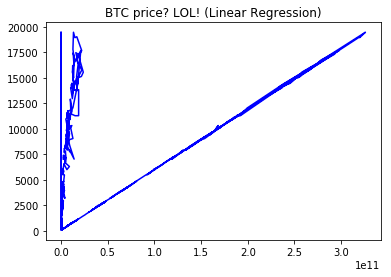

In [96]:
plt.title('BTC price? LOL! (Linear Regression)')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.show()

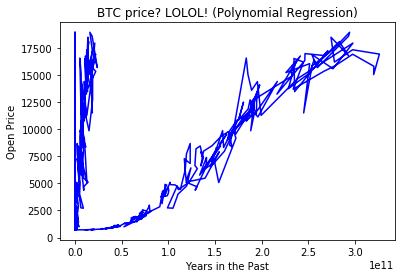

In [93]:
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('BTC price? LOLOL! (Polynomial Regression)')
plt.xlabel('Years in the Past')
plt.ylabel('Open Price')
plt.show()

In [ ]:
# Fitting Polynomial Regression to the dataset with data split
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

In [ ]:
# Fitting Multiple Linear Regression to the Training set with data split
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
plt.title('BTC price? LOL! (Linear Regression)')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

In [ ]:
# Why is this one not trying to fit the data as well as the non-split polynomial regression?
plt.plot(X_train, lin_reg_2.predict(poly_reg.fit_transform(X_train)), color = 'blue')
plt.title('BTC price? LOLOL! (Polynomial Regression)')
plt.xlabel('Years in the Past')
plt.ylabel('Open Price')
plt.show()